# Defining Directories and categories first print data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd
from keras.utils import np_utils

TRAIN_DATADIR = "/home/reinaldo/Documentos/PetImages/database"
TEST_DATADIR = "/home/reinaldo/Documentos/PetImages/"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

In [2]:
print(img_array)

[[247 255 251 ... 174 183 192]
 [246 250 255 ... 190 197 206]
 [248 247 255 ... 193 199 205]
 ...
 [166 160 157 ... 214 202 192]
 [167 162 159 ... 226 212 200]
 [167 163 162 ... 240 224 209]]


In [3]:
print(img_array.shape)

(307, 315)


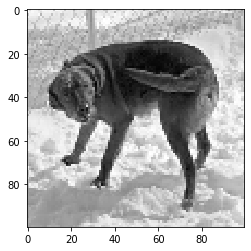

(100, 100)


In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.imshow(new_array2, cmap='gray')
plt.show()
print(new_array.shape)

# Create training and test data

In [5]:
training_data = []
test_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path_train = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats to train
        path_test = os.path.join(TEST_DATADIR,category)  # create path to dogs and cats to test
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path_train)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_train,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        for img in tqdm(os.listdir(path_test)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_test,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array2, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass            
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
print(len(test_data))


100%|██████████| 12501/12501 [00:11<00:00, 1112.30it/s]

200
24946


In [6]:
import random

random.shuffle(training_data)
random.shuffle(test_data)

# Reshape training and test data

In [7]:
X_test = []
X_train = []
y_test = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

#print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[13]
   [ 9]
   [11]
   ...
   [30]
   [27]
   [23]]

  [[13]
   [ 9]
   [ 9]
   ...
   [14]
   [24]
   [51]]

  [[32]
   [17]
   [11]
   ...
   [44]
   [21]
   [27]]

  ...

  [[12]
   [18]
   [17]
   ...
   [83]
   [85]
   [95]]

  [[11]
   [13]
   [15]
   ...
   [91]
   [86]
   [85]]

  [[10]
   [10]
   [19]
   ...
   [72]
   [57]
   [59]]]]
[[[[ 30]
   [ 43]
   [ 30]
   ...
   [134]
   [ 39]
   [ 29]]

  [[ 37]
   [ 41]
   [ 33]
   ...
   [138]
   [ 73]
   [ 35]]

  [[ 49]
   [ 46]
   [ 37]
   ...
   [169]
   [111]
   [ 45]]

  ...

  [[173]
   [164]
   [154]
   ...
   [146]
   [129]
   [170]]

  [[145]
   [144]
   [146]
   ...
   [144]
   [179]
   [142]]

  [[121]
   [115]
   [141]
   ...
   [132]
   [130]
   [139]]]]


In [8]:
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)

pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)

pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


# Saving data on pickle files

In [9]:
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# Apply data on first training machine

In [10]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import keras

import pickle

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

y_test = np_utils.to_categorical(y_test,2)
y_train = np_utils.to_categorical(y_train,2)

X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential()

model.add(Conv2D(20, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(20))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])
print("reinaldo")
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
print("score of the model test:")
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
prediction = model.predict(X_test, batch_size=1)
#print(prediction)


W0729 14:19:20.865730 139769613440640 deprecation.py:506] From /home/reinaldo/masters/ai/.venv/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


reinaldo
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 6ms/sample - loss: 2.0163 - categorical_accuracy: 0.5214 - val_loss: 1.8737 - val_categorical_accuracy: 0.4833
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 1.0891 - categorical_accuracy: 0.5214 - val_loss: 0.7804 - val_categorical_accuracy: 0.5167
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 0.7330 - categorical_accuracy: 0.4929 - val_loss: 0.7089 - val_categorical_accuracy: 0.5167
Epoch 4/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.6567 - categorical_accuracy: 0.6429 - val_loss: 0.6853 - val_categorical_accuracy: 0.5833
Epoch 5/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.6028 - categorical_accuracy: 0.8071 - val_loss: 0.6787 - val_categorical_accuracy: 0.5833
score of the model test:
[0.6915008504895538, 0.53872365]


# sorting the predictions without lose index 

In [11]:
pred_index = np.argsort(prediction)

print(S_pred)
print(type(prediction[:1]))
    

[[0.30572957 0.69427043]
 [0.4738963  0.52610373]
 [0.39603266 0.6039673 ]
 ...
 [0.47151968 0.5284803 ]
 [0.48503202 0.514968  ]
 [0.46976355 0.53023636]]
<class 'numpy.ndarray'>


In [56]:
from numpy.random import rand
testando = [rand(2), rand(2), rand(2)]
testando=np.array(testando)
testando_value = np.sort(testando,axis=1)
testando_index = np.argsort(testando)
print(testando_value)
print(testando_index)

[[0.27127529 0.295366  ]
 [0.1467055  0.51042462]
 [0.14636223 0.1907725 ]]
[[0 1]
 [0 1]
 [1 0]]
